In [36]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score

import config as CONFIG
warnings.filterwarnings("ignore")

In [10]:
lens = []
reals = []
preds = []

for i in range(0, 31):
    if i == 22:
        continue
    df = pd.read_csv(os.path.join(CONFIG.PATH_PROCESSED, f"mcelog_{i}.csv"))
    df = df.fillna(-1)
    hosts = df["sid"].drop_duplicates().to_list()
    for host in tqdm(hosts):
        host_df = df[df["sid"] == host]
        lens.append(len(host_df))
        
        if host_df["failure_type"].sum() < 0:
            reals.append(0)
        else:
            reals.append(1)
            
        break
            
    break

  0%|                                                                                               | 0/1906 [00:00<?, ?it/s]


In [13]:
for host in tqdm(hosts):
        host_df = df[df["sid"] == host]
        lens.append(len(host_df))
        
        if host_df["failure_type"].sum() < 0:
            reals.append(0)
        else:
            reals.append(1)

100%|████████████████████████████████████████████████████████████████████████████████████| 1906/1906 [04:07<00:00,  7.69it/s]


In [21]:
alllens = []
allreals = []
allpreds = []

for i in range(0, 31):
    if i == 22:
        continue
    lens = np.load(f"__lens_{i}.npy")
    reals = np.load(f"__reals_{i}.npy")
    alllens.extend(lens.tolist())
    allreals.extend(reals.tolist())


In [23]:
len(allreals)

30264

In [52]:
sum(allreals)

566

In [54]:
sum(alllens)

40554753

In [26]:
d = {}

for threshold in tqdm(range(0, 7000, 100)):
    allpreds = []
    for i in range(len(alllens)):
        if alllens[i] >= threshold:
            allpreds.append(1)
        else:
            allpreds.append(0)
    precision = precision_score(allreals, allpreds)
    recall = recall_score(allreals, allpreds)
    d[threshold] = [precision, recall]

100%|████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:08<00:00,  8.02it/s]


In [27]:
d

{0: [0.018702088289717155, 1.0],
 100: [0.029104343124887366, 0.5706713780918727],
 200: [0.029500932835820896, 0.4469964664310954],
 300: [0.03228371501272265, 0.3586572438162544],
 400: [0.03023418385180007, 0.30565371024734983],
 500: [0.028697149416491294, 0.26501766784452296],
 600: [0.026954177897574125, 0.22968197879858657],
 700: [0.024939306996248068, 0.19964664310954064],
 800: [0.02363507445048452, 0.17667844522968199],
 900: [0.024138798089011818, 0.1696113074204947],
 1000: [0.023630504833512353, 0.15547703180212014],
 1100: [0.021609326130224624, 0.13427561837455831],
 1200: [0.020964360587002098, 0.12367491166077739],
 1300: [0.02126309108219613, 0.11837455830388692],
 1400: [0.020819341840161182, 0.10954063604240283],
 1500: [0.020480225988700564, 0.10247349823321555],
 1600: [0.01845699520118125, 0.08833922261484099],
 1700: [0.01794771751853297, 0.0812720848056537],
 1800: [0.016549441456350848, 0.0706713780918728],
 1900: [0.016810540663334848, 0.06537102473498234],


findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 


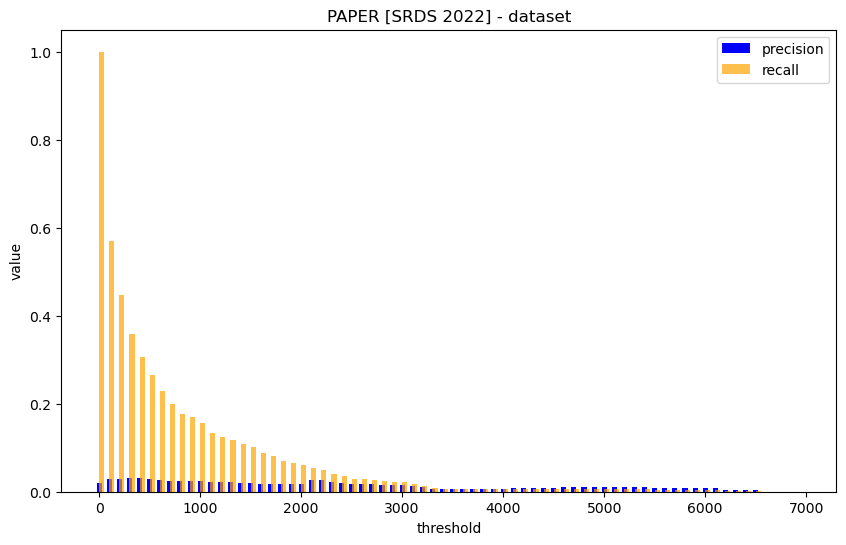

In [46]:
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
data = d

keys = list(data.keys())
values = list(data.values())
y1 = [val[0] for val in values]
y2 = [val[1] for val in values]

plt.figure(figsize=(10, 6))  # 设置图形大小

plt.bar(keys, y1, width=50, label='precision', align='center', color='blue')
plt.bar(keys, y2, width=50, label='recall', align='edge', color='orange', alpha=0.7)

plt.xlabel('threshold')
plt.ylabel('value')
plt.title('PAPER [SRDS 2022] - dataset')
plt.legend()
plt.savefig("PAPER[SRDS-2022].png")
plt.show()
# plt.savefig("PAPER[SRDS-2022].png")

In [49]:



d_ali = {}

with open("ali.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.replace("\n", "")
        line_list = line.split("\t")
        k = int(line_list[0].split(":")[1].replace(" ", "").replace(",",""))
        v1 = float(line_list[1].split(":")[1].replace(" ", "").replace(",",""))
        v2 = float(line_list[2].split(":")[1].replace(" ", "").replace(",",""))
        d_ali[k] = [v1, v2]

In [50]:
d_ali

{200: [0.13191489361702127, 0.6846625766871166],
 100: [0.11265490048817124, 0.7361963190184049],
 300: [0.14034931384779897, 0.6441717791411042],
 400: [0.14432239761402488, 0.6085889570552148],
 500: [0.14622758964143426, 0.5764417177914111],
 600: [0.14687276527861817, 0.5460122699386503],
 700: [0.1465205098953425, 0.5177914110429448],
 800: [0.14575855331909673, 0.4920245398773006],
 900: [0.14467368421052632, 0.4684389911383776],
 1000: [0.14312721543914927, 0.44588957055214723],
 1100: [0.1413075780089153, 0.42431678750697155],
 1200: [0.1390985398885519, 0.4032719836400818],
 1300: [0.137023196310137, 0.38414346389806514],
 1400: [0.13503308052283364, 0.36669588080631027],
 1500: [0.13308280017392385, 0.3505112474437628],
 1600: [0.13132645718397698, 0.33588957055214724],
 1700: [0.12963715529753267, 0.32233850595452906],
 1800: [0.12810685904300287, 0.30988411724608045],
 1900: [0.12679031992536904, 0.2984178237003552],
 2000: [0.12581519551273448, 0.2876073619631902],
 2100: 

findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 


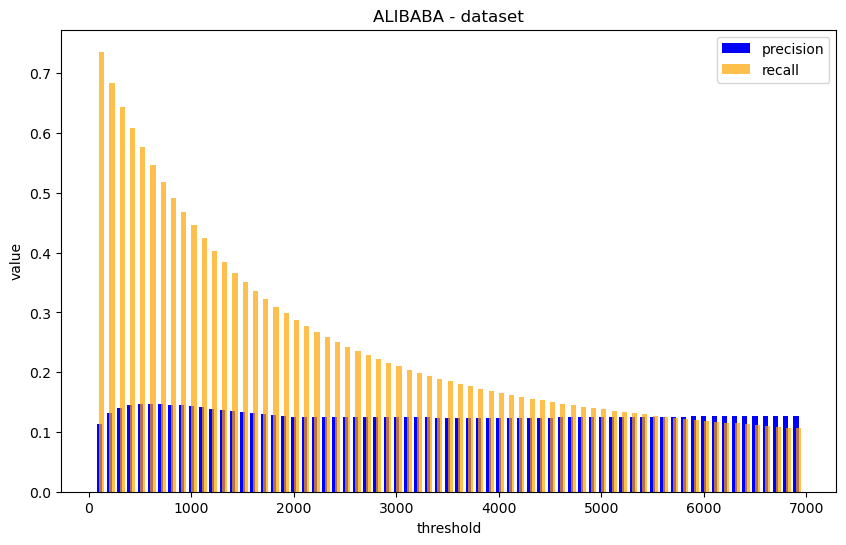

In [51]:
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
data = d_ali

keys = list(data.keys())
values = list(data.values())
y1 = [val[0] for val in values]
y2 = [val[1] for val in values]

plt.figure(figsize=(10, 6))  # 设置图形大小

plt.bar(keys, y1, width=50, label='precision', align='center', color='blue')
plt.bar(keys, y2, width=50, label='recall', align='edge', color='orange', alpha=0.7)

plt.xlabel('threshold')
plt.ylabel('value')
plt.title('ALIBABA - dataset')
plt.legend()
plt.savefig("alibaba.png")
plt.show()
# plt.savefig("PAPER[SRDS-2022].png")